<a href="https://colab.research.google.com/github/SKAZEXE/Zaidi/blob/main/HR_Dep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [193]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [194]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

<ipython-input-195-3063dd3b0e10>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


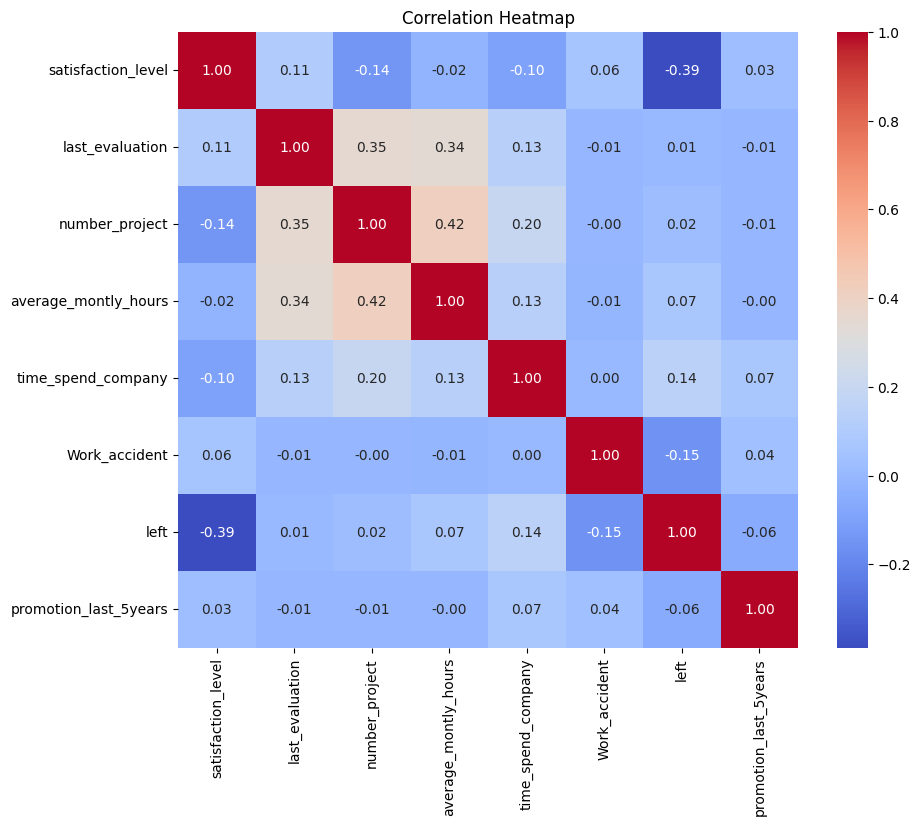

In [195]:
import seaborn as sns

corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

plt.show()


<Axes: xlabel='salary'>

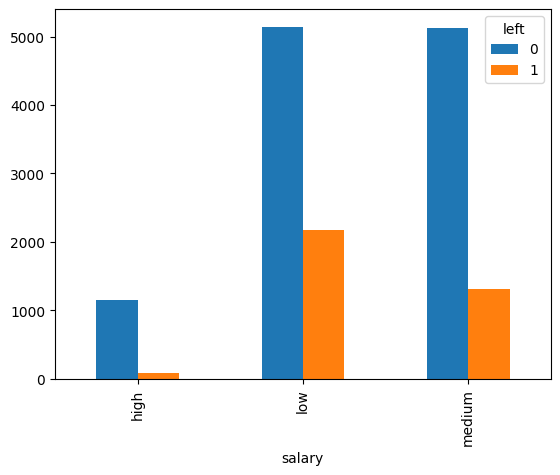

In [196]:
#PLot for the people who left among the salaries
pd.crosstab(df.salary,df.left).plot(kind='bar')


<Axes: xlabel='Department'>

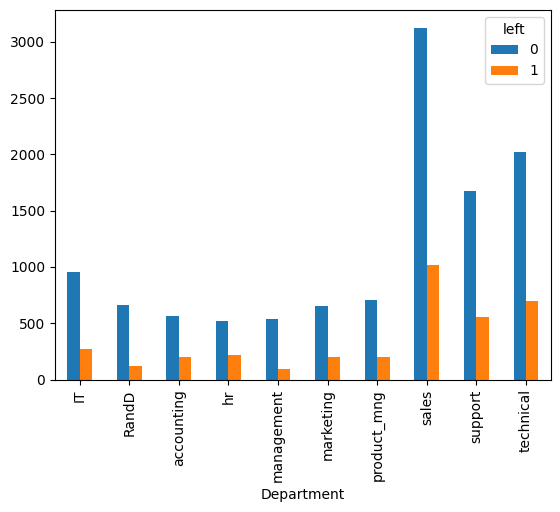

In [197]:
#PLot for the people who left among the departments
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [198]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [199]:
# Assuming 'subdf' is your DataFrame containing the selected features
Salary = pd.get_dummies(subdf, columns=['salary'], prefix=['salary'])

# Display the updated DataFrame
Salary.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [200]:
X = Salary
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [201]:
y = df.left

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)

In [203]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
13811,0.95,151,0,0,0,1
5865,0.17,246,0,1,0,0
4091,0.57,200,0,0,1,0
9790,0.72,229,0,0,0,1
9325,0.55,168,0,0,1,0
...,...,...,...,...,...,...
13044,0.96,247,0,0,1,0
12420,0.09,268,0,0,0,1
6644,0.64,279,0,0,0,1
2247,0.78,194,0,0,0,1


In [204]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [205]:
model.fit(X_train, y_train)

LogisticRegression()

In [206]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [207]:
model.predict_proba(X_test)


array([[0.95077853, 0.04922147],
       [0.75078452, 0.24921548],
       [0.72429097, 0.27570903],
       ...,
       [0.83175932, 0.16824068],
       [0.90492279, 0.09507721],
       [0.72079191, 0.27920809]])

In [212]:
# Create a DataFrame with the new employee's information
new_employee = pd.DataFrame([[0.30, 100, 1, 0, 0, 1]], columns=['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium'])

# Assuming you've already one-hot encoded the 'salary' column as in your previous code

# Make a prediction using your trained logistic regression model
predicted_class = model.predict(new_employee)

# Print the predicted class label
if predicted_class[0] == 1:
    print("Predicted Class: Employee will leave")
else:
    print("Predicted Class: Employee will stay")

Predicted Class: Employee will stay


In [221]:
# Create a DataFrame with feature values for an employee likely to leave
new_employee = pd.DataFrame([[.10, 60, 0, 0, 1, 0]], columns=['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium'])

# Assuming you've already one-hot encoded the 'salary' column as in your previous code

# Make a prediction using your trained logistic regression model
predicted_class = model.predict(new_employee)

# Print the predicted class label
if predicted_class[0] == 1:
    print("Predicted Class: Employee will leave")
else:
    print("Predicted Class: Employee will stay")

Predicted Class: Employee will leave


In [209]:
model.score(X_test, y_test)

0.7789166666666667